In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier


iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(
  tree_clf,
  out_file="iris_tree.dot",
  feature_names=["petal length (cm)", "petal width (cm)"],
  class_names=iris.target_names,
  rounded=True,
  filled=True
)

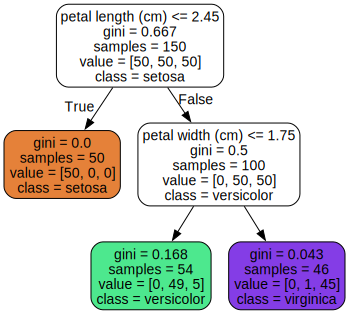

In [4]:
from graphviz import Source

Source.from_file("iris_tree.dot")